# HW 1 Part 3: Preprocessing the BayWheels Bike Dataset

The original dataset is available here: https://s3.amazonaws.com/baywheels-data/index.html
You will each work on a subset of the dataset as follows:

Take the last two digits of your SJSU ID. Pick the month corresponding to the last digit of your SJSU ID. For example, if your SJSU ID ends in 7, you will pick July. If the digit in the tens place is even, pick the dataset for the year 2020. If it is odd, pick the dataset for the year 2021.

For example, if your SJSU ID is 123456789, the last digit of your SJSU ID is 9 and the digit in the tens place is even. So, you will pick the dataset for September 2020, i.e., 202009-baywheels-tripdata.csv.zip. If your SJSU ID is 098765432, the last digit of your SJSU ID is 2 and the digit in the tens place is odd. So, you will pick the dataset for February 2021, i.e., 202102-baywheels-tripdata.csv.zip.

Perform the following tasks on the provided dataset. High pass and low pass specifications are on Canvas. Please note that ALL questions labelled [LP] must be completed satisfactorily to receive a low pass on the assignment. The [HP] question specifications combine all parts of the homework. Please refer to Canvas for more details.

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission.
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”


**DATASET I PICKED BASED ON THE ABOVE INSTRUCTIONS**
My SJSU ID is 018291533 , So I picked March 2021 dataset which is 202103-baywheels-tripdata.csv.zip


In [13]:
## Your code goes here. Import the csv into a pandas dataframe here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from google.colab import drive

#drive.mount('/content/drive')
#!ls "/content/drive/MyDrive/Colab"
#baywheels_data = pd.read_csv("/content/drive/MyDrive/Colab/202103-baywheels-tripdata.csv",header=None,na_values="?")


url = "https://raw.githubusercontent.com/madhunicabala/DataPreProcessing-255Assignment/refs/heads/main/202103-baywheels-tripdata.csv"
baywheels_data = pd.read_csv(url,header=None,na_values="?")

#Print a message saying that data has been uploaded successfully.
baywheels_data.info()

# Shape and preview
print('Bank Dataset shape:', baywheels_data.shape)
baywheels_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131961 entries, 0 to 131960
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       131961 non-null  object
 1   1       131961 non-null  object
 2   2       131961 non-null  object
 3   3       131961 non-null  object
 4   4       99356 non-null   object
 5   5       99356 non-null   object
 6   6       95961 non-null   object
 7   7       95961 non-null   object
 8   8       131961 non-null  object
 9   9       131961 non-null  object
 10  10      131811 non-null  object
 11  11      131811 non-null  object
 12  12      131961 non-null  object
dtypes: object(13)
memory usage: 13.1+ MB
Bank Dataset shape: (131961, 13)


/tmp/ipython-input-4105766299.py:15: DtypeWarning: Columns (8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  baywheels_data = pd.read_csv(url,header=None,na_values="?")


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1,2DF89AABE9E566FD,electric_bike,2021-03-12 13:36:24,2021-03-12 13:48:00,NaN,NaN,NaN,NaN,37.34,-121.88,37.34,-121.88,member
2,C5AF654BDB7A2F42,electric_bike,2021-03-12 14:37:00,2021-03-12 14:48:18,NaN,NaN,NaN,NaN,37.34,-121.88,37.34,-121.88,member
3,CC19B638AE298FED,electric_bike,2021-03-12 13:37:23,2021-03-12 13:46:57,NaN,NaN,NaN,NaN,37.34,-121.88,37.33,-121.88,member
4,3FCA456D3201C122,electric_bike,2021-03-11 16:46:25,2021-03-11 16:49:48,NaN,NaN,NaN,NaN,37.33,-121.88,37.32,-121.88,member


[HP] Extract ridership data grouped by hour of the day for each day of the month. We only need the start station names and total number of rides. Suggested steps are as follows:

1. Handle the null values in the "start_station_name" and "end_station_name" columns. You may choose to drop the rows if necessary. Provide a short explanation of the choice you made.

2. Extract only the date and hour part of the "started_at" column in a new column, e.g., "2020-12-15,6" for 6:00 am to 6:59 am on 2020-12-15. You may need to use the to_datetime function on the pandas column "started_at".

3. Group the columns by the new column such that the final set of columns are as follows:
*   Date and Hour
*   List of Locations from which rides started in the Date and Hour
*   Total Rides in the Date and Hour
You may need to use the [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function on pandas.

Explain the steps you used to extract the data

**Steps Explained that handles missing values.**

In order to handle missing values, I used dropna() method from pandas library.

baywheels_data.dropna() is the core function which is used to remove rows / columns with misisng values (NaN or None).

The argument "start_station_name", "end_station_name" specifically tells to consider this specific columns. If a row has a missing value, the entire row will be dropped.

Finally, dataframe is updated with no misisng values. By using this method, we ensure that we keep the rows where both the start and end station names are recorded.

We need to drop rows where any column value is missing because our final goal is to group the data by station location. If the start location is incomplete, we cannot accurately group the ridership data as required in the task.

**REPRESENTING THE DATA USING HEAT MAP BEFORE AND AFTER DROPPING VALUES (FOR BETTER UNDERSTANDING)**

Each row in the heatmap represents a ROW in the data frame.
Each column in the heatmap represents the column names (x-axis)

The COLORS in the heatmap indicate the presence or absence of misisng values.
A solid color means there are no misisng values in that cell.

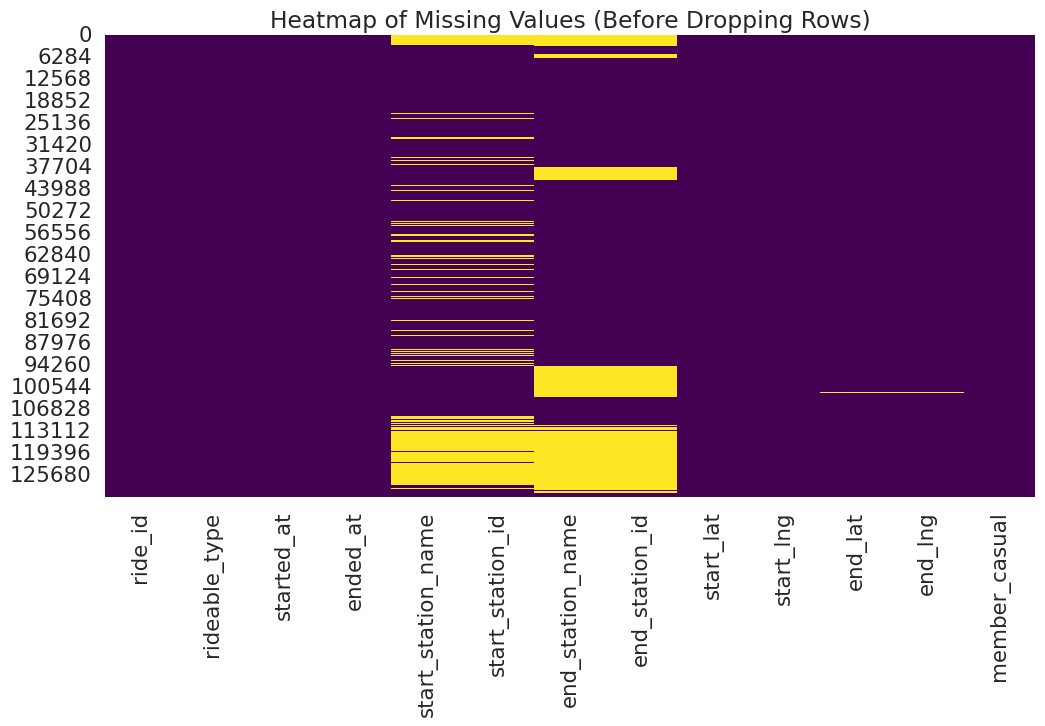

In [14]:
# Reload the data, specifying the header row and low_memory
baywheels_data = pd.read_csv(url,header=0,na_values="?", low_memory=False)
#baywheels_data = pd.read_csv("/content/drive/MyDrive/Colab/202103-baywheels-tripdata.csv", header=0, na_values="?", low_memory=False)

# Display heatmap before dropping rows
plt.figure(figsize=(12, 6))
sns.heatmap(baywheels_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values (Before Dropping Rows)')
plt.show()

DataFrame columns after setting header: Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Bank Dataset shape after dropping rows: (82804, 13)


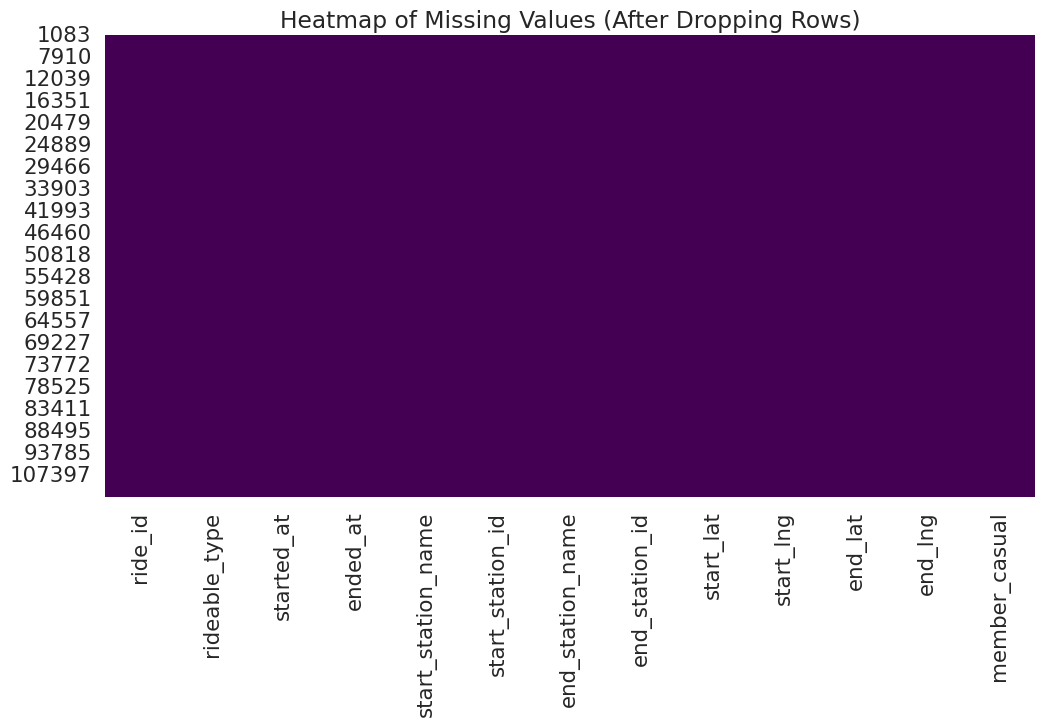

In [15]:
# Drop rows with missing values in 'start_station_name' or 'end_station_name'
baywheels_data = baywheels_data.dropna(subset=['start_station_name', 'end_station_name'])

# Print column names to verify
print("DataFrame columns after setting header:", baywheels_data.columns)
print('Bank Dataset shape after dropping rows:', baywheels_data.shape)

# Add a heatmap to visualize null values after dropping rows
plt.figure(figsize=(12, 6))
sns.heatmap(baywheels_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values (After Dropping Rows)')
plt.show()

**Steps Involved in extracting Date and Hour in the Dataframe**

We have extracted the date and hour from the 'started_at' column and then we converted the 'started_at' column to datetime objects and then formatted it to a string in the format "YYYY-MM-DD,H" (e.g., "2020-12-15,6") to create a new column called 'Date and Hour'.

This new column serves as the basis for grouping the data by the hour of the day for each day.


In [16]:
# Convert 'started_at' to datetime objects
baywheels_data['started_at'] = pd.to_datetime(baywheels_data['started_at'])

# Extract date and hour in the specified format
baywheels_data['Date and Hour'] = baywheels_data['started_at'].dt.strftime('%Y-%m-%d,%H')

# Display the first few rows with the new column
display(baywheels_data.head())

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Date and Hour
1083,5A6CEE1E4CA23640,classic_bike,2021-03-30 18:36:29,2021-03-30 19:29:42,Market St at 45th St,OK-F2-2,Market St at 45th St,OK-F2-2,37.834174,-122.272968,37.834174,-122.272968,casual,"2021-03-30,18"
2709,01659FCF5970FA93,electric_bike,2021-03-21 16:32:24,2021-03-21 16:43:49,Commercial St at Montgomery St,SF-E27,Brannan St at 7th St,SF-K27-2,37.793856,-122.402596,37.772868,-122.403569,casual,"2021-03-21,16"
2710,49854C0830733591,electric_bike,2021-03-28 14:04:20,2021-03-28 14:21:27,Howard St at 6th St,SF-I26-,North Point St at Grant Ave,SF-A26,37.780290,-122.406822,37.807224,-122.409031,member,"2021-03-28,14"
2711,B18DCE9C02721053,classic_bike,2021-03-13 16:03:01,2021-03-13 16:23:53,Howard St at 6th St,SF-I26-,Jackson St at Polk St,SF-E23,37.780265,-122.406644,37.794160,-122.421568,casual,"2021-03-13,16"
2712,B940CCF3077AFC69,electric_bike,2021-03-13 16:02:23,2021-03-13 16:24:00,Howard St at 6th St,SF-I26-,Jackson St at Polk St,SF-E23,37.780233,-122.406655,37.794206,-122.421579,casual,"2021-03-13,16"


In [17]:
# Group by 'Date and Hour' and aggregate the required information
grouped_data = baywheels_data.groupby('Date and Hour').agg(
    start_station_names=('start_station_name', list),
    total_rides=('ride_id', 'count')
).reset_index()

# Rename the columns for clarity
grouped_data.rename(columns={'start_station_names': 'List of Locations from which rides started in the Date and Hour',
                             'total_rides': 'Total Rides in the Date and Hour'}, inplace=True)

# Display the grouped data
display(grouped_data.head())

,Date and Hour,List of Locations from which rides started in the Date and Hour,Total Rides in the Date and Hour
0,"2021-03-01,00","[Howard St at 6th St, The Embarcadero at Valle...",9
1,"2021-03-01,01","[Sanchez St at 15th St, Civic Center/UN Plaza ...",8
2,"2021-03-01,02","[23rd Ave at Foothill Blvd, The Embarcadero at...",2
3,"2021-03-01,03",[San Francisco City Hall (Polk St at Grove St)...,5
4,"2021-03-01,04","[Washington St at Kearny St, 23rd St at Tennes...",8


**Final Step - grouping the data **

We grouped the DataFrame by the newly created 'Date and Hour' column. For each unique combination of date and hour, we performed two aggregations as follows,

1. We collected all the corresponding 'start_station_name' values into a list.
We counted the number of rides (ride_id) to get the total rides for that date and hour.

2. Lastly, We reset the index and renamed the aggregated columns to 'List of Locations from which rides started in the Date and Hour' and 'Total Rides in the Date and Hour' for clarity and to match the requested output format.

These steps resulted in a DataFrame grouped by date and hour, containing a list of start locations and the total number of rides for each hour of each day in the dataset.

Save your grouped data in a file called **preprocessed_baywheels_month_year.csv**, where month and year refer to the dataset you are working on based on your SJSU ID. Submit this file along with the ipynb solution file.

As indicated, the grouped dataset can be saved locally and I have also included code to fetch it from github and read the csv.
 .

In order to save the grouped data dataframe to the CSV file, I used to_CSV() method.

In [18]:
# Save the grouped data to a CSV file
# Save data locally first and then upload to github

grouped_data.to_csv("preprocessed_baywheels_202103.csv", index=False)
#grouped_data.to_csv("/content/drive/MyDrive/Colab/preprocessed_baywheels_202103.csv", index=False)
from google.colab import files
files.download("preprocessed_baywheels_202103.csv")

url = "https://raw.githubusercontent.com/madhunicabala/DataPreProcessing-255Assignment/main/preprocessed_baywheels_202103.csv"
cleaned_df = pd.read_csv(url)

print("Processed data saved to preprocessed_baywheels_202103.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processed data saved to preprocessed_baywheels_202103.csv


# References
Include ALL your references here.

# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository
3. The preprocessed file